### Compare effect of using Ryan or Atkin respiration for  C4 plants

#### Libraries

In [1]:
import numpy as np
import xarray as xr
import csv
import pandas as pd

import functions_py.fates_xarray_functions as fa
import functions_py.fates_nearest_gridcell as ngr

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import cartopy.crs as ccrs
from matplotlib import cm
from matplotlib.colors import Normalize
from matplotlib.colors import BoundaryNorm


In [2]:
dark = cm.get_cmap('Dark2', 8)
colormap = dark(range(8))

In [3]:
pfts = ['broadleaf_evergreen_tropical_tree','needleleaf_evergreen_extratrop_tree',
         'needleleaf_colddecid_extratrop_tree','broadleaf_evergreen_extratrop_tree',
        'broadleaf_hydrodecid_tropical_tree','broadleaf_colddecid_extratrop_tree',
        'broadleaf_evergreen_extratrop_shrub','broadleaf_hydrodecid_extratrop_shrub',
        'broadleaf_colddecid_extratrop_shrub', 'arctic_c3_grass',
        'cool_c3_grasss','c4_grass']

In [4]:
w = [  2,   2,   6, -10,  10,   6,  10, -18, -14,  -6,  10, -14,  -2,
        18,  14,  14, -18]
z = [ 25,  30, 355,  35, 285, 295, 275, 315, 295, 310, 295, 305, 280,
       100, 100,  75, 145]
lat_un = xr.DataArray(w, dims = ['location']).astype(int)
lon_un = xr.DataArray(z, dims = ['location']).astype(int)

#### Load all the variations

In [5]:
# atkin for both C3 and C4 grasses
fates_atkin = '/compyfs/need138/elm_runs/fixedbiogeog_nocomp_Atkin_high_soilmoisture_dbh_init.Eb645be3-Fd993b62.2023-03-06/run/lnd/hist/fixedbiogeog_nocomp_Atkin_high_soilmoisture_dbh_init.Eb645be3-Fd993b62.2023-03-06.elm.h0.2090s.nc'
fates_atkin = xr.open_dataset(fates_atkin, decode_times=False)
time = fates_atkin.variables['time']/365.

n_lat = len(fates_atkin.variables['lat'])
n_lon = len(fates_atkin.variables['lon'])
cohort_size_bins = fates_atkin.variables['fates_levscls'][:]
nsizebins = len(cohort_size_bins)

nyears = int(len(fates_atkin.variables['time'])/12)
time = fates_atkin.variables['time'] / 365.

# Atkin for C3 and Ryan for C4
fates_atkin_v2 = '/compyfs/need138/elm_runs/fixedbiogeog_nocomp_Atkin_high_soilmoisture_dbh_init_oldc3c4logic.Eb645be3-F62748f9.2023-03-08/run/lnd/hist/fixedbiogeog_nocomp_Atkin_high_soilmoisture_dbh_init_oldc3c4logic.Eb645be3-F62748f9.2023-03-08.elm.h0.2090s.nc'
fates_atkin_v2 = xr.open_dataset(fates_atkin_v2, decode_times=False)
time_v2 = fates_atkin_v2.variables['time']/365.

### Biomass C3 and C4 plants

In [6]:
vegc = fates_atkin.FATES_VEGC_PF.mean(dim='time') 
vegc_c3 = vegc.isel(fates_levpft = 10)
vegc_c4 = vegc.isel(fates_levpft = 11)

vegc_v2 = fates_atkin_v2.FATES_VEGC_PF.mean(dim='time') 
vegc_c3_v2 = vegc_v2.isel(fates_levpft = 10)
vegc_c4_v2 = vegc_v2.isel(fates_levpft = 11)

veg_c3_diff = vegc_c3 - vegc_c3_v2
veg_c4_diff = vegc_c4 - vegc_c4_v2

Text(0.5, 1.0, 'C4 diff')

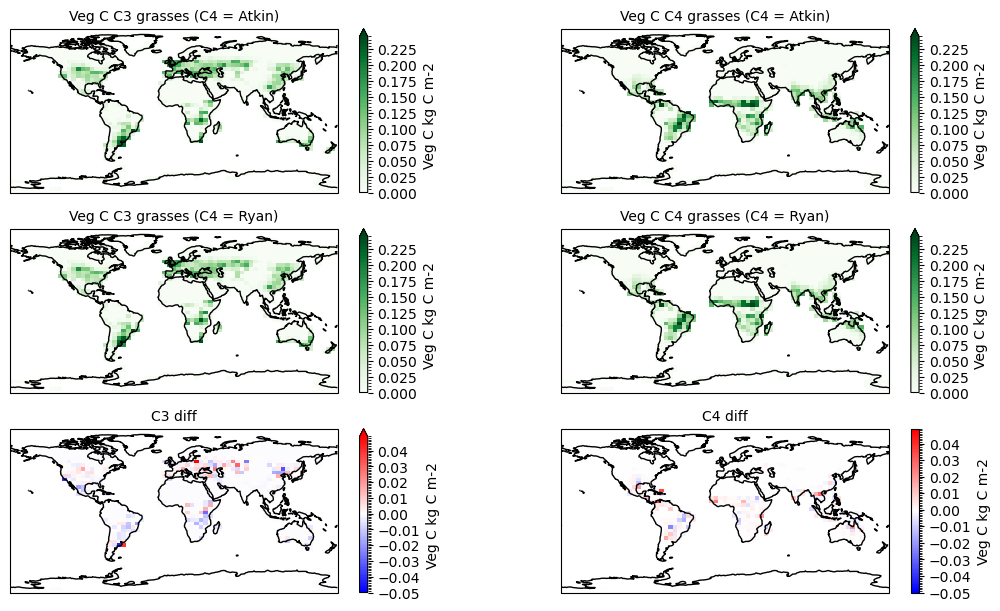

In [7]:
fig, axs = plt.subplots(nrows=3,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,6), constrained_layout=True)

clevs = np.arange(0.,0.25,0.005)
axs=axs.flatten()

vegc_c3.plot(levels=clevs, transform=ccrs.PlateCarree(),cmap='Greens',
         cbar_kwargs={"label": "Veg C kg C m-2"}, ax=axs[0])
axs[0].coastlines()
axs[0].set_title('Veg C C3 grasses (C4 = Atkin)', fontsize=10)

vegc_c4.plot(levels=clevs, transform=ccrs.PlateCarree(),cmap='Greens',
         cbar_kwargs={"label": "Veg C kg C m-2"}, ax=axs[1])
axs[1].coastlines()
axs[1].set_title('Veg C C4 grasses (C4 = Atkin)', fontsize=10)

vegc_c3_v2.plot(levels=clevs, transform=ccrs.PlateCarree(),cmap='Greens',
         cbar_kwargs={"label": "Veg C kg C m-2"}, ax=axs[2])
axs[2].coastlines()
axs[2].set_title('Veg C C3 grasses (C4 = Ryan)', fontsize=10)

vegc_c4_v2.plot(levels=clevs, transform=ccrs.PlateCarree(),cmap='Greens',
         cbar_kwargs={"label": "Veg C kg C m-2"}, ax=axs[3])
axs[3].coastlines()
axs[3].set_title('Veg C C4 grasses (C4 = Ryan)', fontsize=10)

clevs = np.arange(-0.05,0.05,0.001)

veg_c3_diff.plot(levels=clevs, transform=ccrs.PlateCarree(),cmap='bwr',
         cbar_kwargs={"label": "Veg C kg C m-2"}, ax=axs[4])
axs[4].coastlines()
axs[4].set_title('C3 diff', fontsize=10)

veg_c4_diff.plot(levels=clevs, transform=ccrs.PlateCarree(),cmap='bwr',
         cbar_kwargs={"label": "Veg C kg C m-2"}, ax=axs[5])
axs[5].coastlines()
axs[5].set_title('C4 diff', fontsize=10)


### NPP C4 and C4 plants

In [8]:
npp = fates_atkin.FATES_NPP_PF.mean(dim='time') * 86400 * 365 
npp_c3 = npp.isel(fates_levpft = 10)
npp_c4 = npp.isel(fates_levpft = 11)

npp_v2 = fates_atkin_v2.FATES_NPP_PF.mean(dim='time') * 86400 * 365 
npp_c3_v2 = npp_v2.isel(fates_levpft = 10)
npp_c4_v2 = npp_v2.isel(fates_levpft = 11)

npp_c3_diff = npp_c3 - npp_c3_v2
npp_c4_diff = npp_c4 - npp_c4_v2

Text(0.5, 1.0, 'C4 diff')

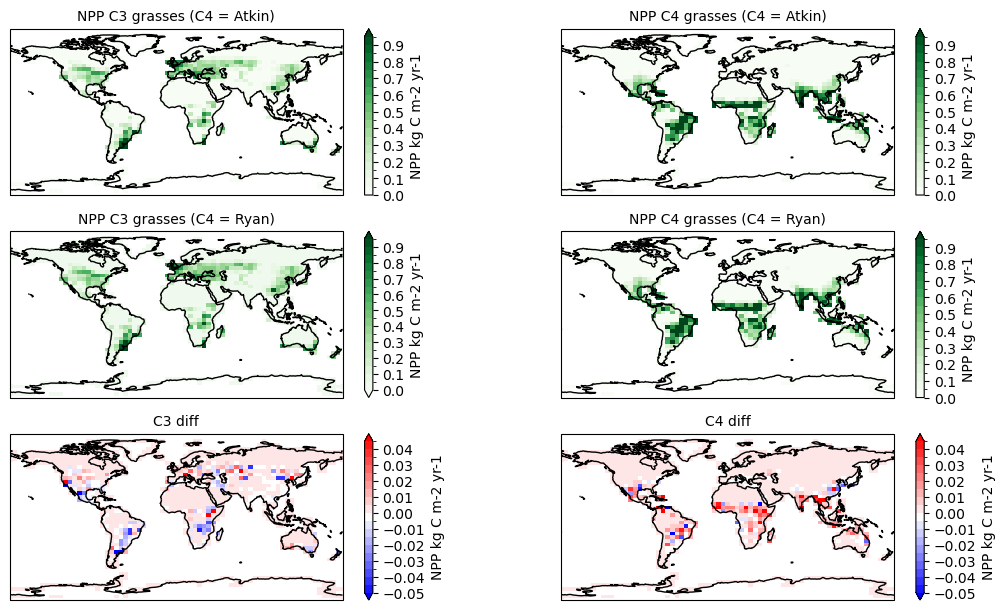

In [9]:
fig, axs = plt.subplots(nrows=3,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,6), constrained_layout=True)

clevs = np.arange(0.,1.,0.05)
axs=axs.flatten()

npp_c3.plot(levels=clevs, transform=ccrs.PlateCarree(),cmap='Greens',
         cbar_kwargs={"label": "NPP kg C m-2 yr-1"}, ax=axs[0])
axs[0].coastlines()
axs[0].set_title('NPP C3 grasses (C4 = Atkin)', fontsize=10)

npp_c4.plot(levels=clevs, transform=ccrs.PlateCarree(),cmap='Greens',
         cbar_kwargs={"label": "NPP kg C m-2 yr-1"}, ax=axs[1])
axs[1].coastlines()
axs[1].set_title('NPP C4 grasses (C4 = Atkin)', fontsize=10)

npp_c3_v2.plot(levels=clevs, transform=ccrs.PlateCarree(),cmap='Greens',
         cbar_kwargs={"label": "NPP kg C m-2 yr-1"}, ax=axs[2])
axs[2].coastlines()
axs[2].set_title('NPP C3 grasses (C4 = Ryan)', fontsize=10)

npp_c4_v2.plot(levels=clevs, transform=ccrs.PlateCarree(),cmap='Greens',
         cbar_kwargs={"label": "NPP kg C m-2 yr-1"}, ax=axs[3])
axs[3].coastlines()
axs[3].set_title('NPP C4 grasses (C4 = Ryan)', fontsize=10)

clevs = np.arange(-0.05,0.05,0.005)

npp_c3_diff.plot(levels=clevs, transform=ccrs.PlateCarree(),cmap='bwr',
         cbar_kwargs={"label": "NPP kg C m-2 yr-1"}, ax=axs[4])
axs[4].coastlines()
axs[4].set_title('C3 diff', fontsize=10)

npp_c4_diff.plot(levels=clevs, transform=ccrs.PlateCarree(),cmap='bwr',
         cbar_kwargs={"label": "NPP kg C m-2 yr-1"}, ax=axs[5])
axs[5].coastlines()
axs[5].set_title('C4 diff', fontsize=10)

In [10]:
vegc = fates_atkin.FATES_VEGC_PF.mean(dim='time') 
vegc_ev = vegc.isel(fates_levpft = 0)
vegc_hd = vegc.isel(fates_levpft = 4)

vegc_v2 = fates_atkin_v2.FATES_VEGC_PF.mean(dim='time') 
vegc_ev_v2 = vegc_v2.isel(fates_levpft = 0)
vegc_hd_v2 = vegc_v2.isel(fates_levpft = 4)

veg_ev_diff = vegc_ev - vegc_ev_v2
veg_hd_diff = vegc_hd - vegc_hd_v2

Text(0.5, 1.0, 'Hydro-decid diff')

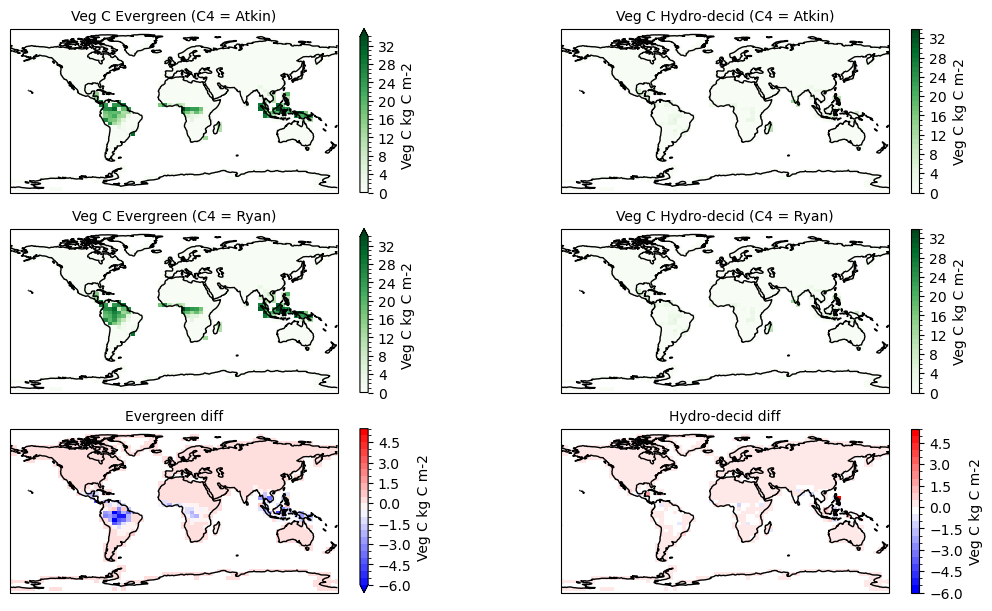

In [11]:
fig, axs = plt.subplots(nrows=3,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,6), constrained_layout=True)

clevs = np.arange(0.,35.,1.0)
axs=axs.flatten()

vegc_ev.plot(levels=clevs, transform=ccrs.PlateCarree(),cmap='Greens',
         cbar_kwargs={"label": "Veg C kg C m-2"}, ax=axs[0])
axs[0].coastlines()
axs[0].set_title('Veg C Evergreen (C4 = Atkin)', fontsize=10)

vegc_hd.plot(levels=clevs, transform=ccrs.PlateCarree(),cmap='Greens',
         cbar_kwargs={"label": "Veg C kg C m-2"}, ax=axs[1])
axs[1].coastlines()
axs[1].set_title('Veg C Hydro-decid (C4 = Atkin)', fontsize=10)

vegc_ev_v2.plot(levels=clevs, transform=ccrs.PlateCarree(),cmap='Greens',
         cbar_kwargs={"label": "Veg C kg C m-2"}, ax=axs[2])
axs[2].coastlines()
axs[2].set_title('Veg C Evergreen (C4 = Ryan)', fontsize=10)

vegc_hd_v2.plot(levels=clevs, transform=ccrs.PlateCarree(),cmap='Greens',
         cbar_kwargs={"label": "Veg C kg C m-2"}, ax=axs[3])
axs[3].coastlines()
axs[3].set_title('Veg C Hydro-decid (C4 = Ryan)', fontsize=10)

clevs = np.arange(-6.,6.,0.5)

veg_ev_diff.plot(levels=clevs, transform=ccrs.PlateCarree(),cmap='bwr',
         cbar_kwargs={"label": "Veg C kg C m-2"}, ax=axs[4])
axs[4].coastlines()
axs[4].set_title('Evergreen diff', fontsize=10)

veg_hd_diff.plot(levels=clevs, transform=ccrs.PlateCarree(),cmap='bwr',
         cbar_kwargs={"label": "Veg C kg C m-2"}, ax=axs[5])
axs[5].coastlines()
axs[5].set_title('Hydro-decid diff', fontsize=10)